In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df = housing_df.drop("MedHouseVal",axis=1)

KeyError: "['MedHouseVal'] not found in axis"

In [6]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

np.random.seed(42)

y = housing_df["target"]
x = housing_df.drop("target",axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)




0.5758549611440126

In [8]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

In [9]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.8688524590163934

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

Tidbit
 1. If you have structured data use ensenble methods
 2. If you have unstructured data,use deep learning or transfer learning

#Use a trained model to make predictions
2 ways 
1.predict()
2.predict_probe()

In [12]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [13]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
#Compare predictions to truth labelsto evaluaute the model
y_predict = clf.predict(x_test)
np.mean(y_predict == y_test)

0.8524590163934426

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8524590163934426

In [16]:
#predict_proba() return probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [17]:
#predict can also be used for regression model

housing_df.head()
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data 
x = housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [18]:
np.array([Y_test[:10]])


array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,y_pred)

0.32659871732073664

In [20]:
housing_df["target"]


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [21]:
#4.Evaluating a machine learning model

Three ways to evaluate the scikit-learn model
1.Estimator's built in parameter
2.The scoring parameter
3. Problem-specific metric function

SyntaxError: invalid decimal literal (907786622.py, line 4)

In [22]:
#Estimator Scoring Parameter
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [23]:
## Evaluating a model using the scoring parameter
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
cross_val_score(clf,x,y,cv=20)

array([0.9375    , 0.875     , 0.75      , 0.8       , 0.8       ,
       0.93333333, 0.86666667, 1.        , 0.93333333, 0.86666667,
       0.86666667, 0.73333333, 0.8       , 0.66666667, 0.86666667,
       0.86666667, 0.66666667, 0.8       , 0.86666667, 0.73333333])

In [24]:
clf_single_score = clf.score(x_test,y_test)
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=20))

clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8414583333333333)

In [25]:
#Default scoring parameter of classifier == mean accuracy i.e. .score()

In [26]:
#Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.85245902, 0.86885246, 0.78688525, 0.81666667, 0.75      ])

Classification model evaluation metrics
1.Accuracy
2.Area under ROC curve
3.Confusion matrix
4.Classification report

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf,x,y,cv=5)

In [28]:
#How likely is it to predict correct i.e. accuracy 
np.mean(cross_val_score)

0.8248087431693989

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
#Area under the reciever operatin characteristic curve (AUC/ROC)

from sklearn.metrics import roc_curve

clf.fit(x_train,y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_preds = clf.predict(x_test)

In [45]:
y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [46]:
y_probs_postive = y_probs[:,1]
y_probs_postive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [47]:
#Calculate fpr tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_postive)

#Check the false positive rates(fpr)
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

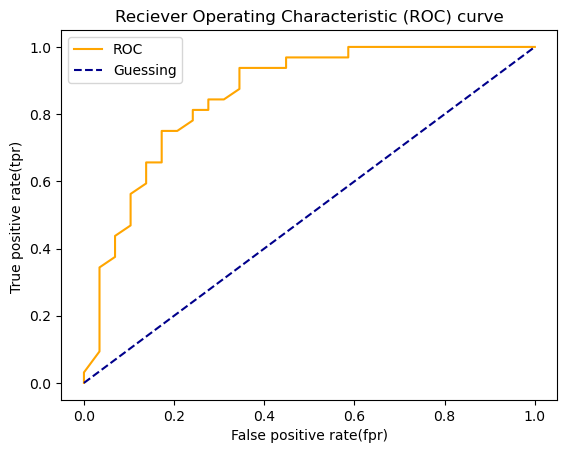

In [48]:
#Create a function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
#Plot line wiht no predicitive power 
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    #Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr) ")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_postive)

0.8561422413793104

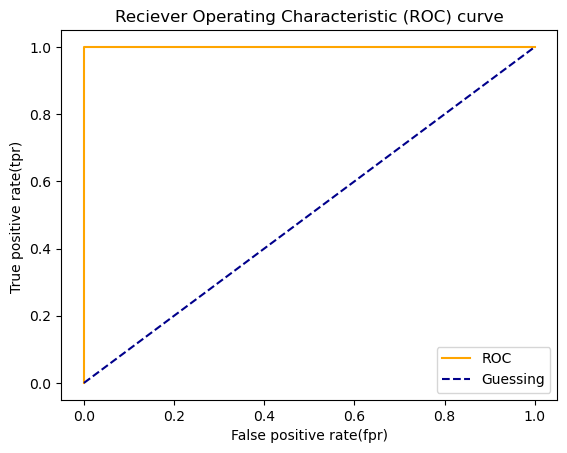

In [50]:
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [51]:
#Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

  A quick way to compare thelabels a model predicts and the actual labels it was supposed to predict.In essence,giving you an idea of where the model is getting confused.

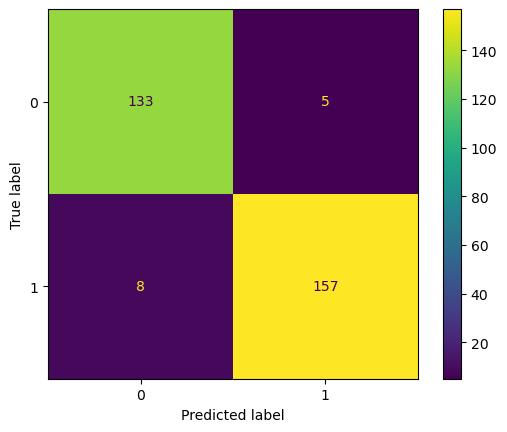

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)



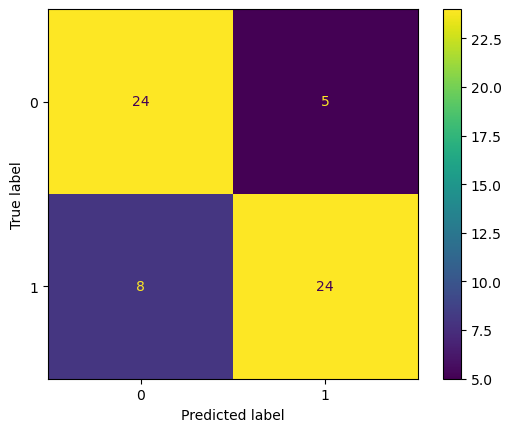

In [53]:

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)


In [55]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [56]:
#Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only positive case
disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT0001\Desktop\sampleproject1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [ ]:
Regression model evaluation metrics
1. R^2(Coefficient of determination)
2.Mean absolute error(MAE)
3.Mean squared error(MSE)


In [57]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data 
x = housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [58]:
model.score(X_test,Y_test)

0.8065734772187598

In [59]:
Y_test.mean()

2.0550030959302323

In [60]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(Y_test),Y_test.mean())

In [61]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

Compares the models predicted value to the mean value of the target
r2_score(y_true=Y_test,
         y_pred=y_test_mean)

In [63]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_preds)
mae

0.32659871732073664

In [67]:
from sklearn.metrics import mean_squared_error
#Mean of square of differences of values
mse = mean_squared_error(Y_test,y_preds)
mse

0.2534678520824551

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

##FINALLY USING THE SCORING PARAMETER##

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf= RandomForestClassifier(n_estimators=100)


In [71]:
np.random.seed(42)
#Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) #scoring becomes accuracy for classification
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [72]:
#Cross validated accuracy
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")


The cross-validated accuracy is 82.48%


In [73]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [74]:
print(f"The cross-validated precision is {np.mean(cv_precision)*100:.2f}%")


The cross-validated precision is 83.30%


In [77]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
print(f"The cross-validated precision is {np.mean(cv_recall)*100:.2f}%")
cv_recall

The cross-validated precision is 85.45%


array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [78]:
#Trying for regression 
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data 
x = housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

model= RandomForestRegressor(n_estimators=100)

In [88]:
cv_reg1 = cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_reg1

array([-0.54460512, -0.41151208, -0.43917232, -0.46970252, -0.47464603])

In [89]:
cv_reg2 = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
cv_reg2

array([-0.51793181, -0.34820267, -0.37320085, -0.44015801, -0.47078641])

##METRIC FUNCTIONS##

In [91]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf= RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
cl_acc = accuracy_score(y_test,y_pred)
cl_acc
#Same for f1_score,precision_Score,recall_score

0.8524590163934426

#For regression import mean_absolute_error,mean_squared_error
then do the same as before